# Statistische Kalibration Time-To-Digital Converter

## Verteilungen

----

#### Prof. Christian Münker, 14. Juni 2017

In [86]:
from __future__ import print_function, division
#show plot in notebook instead of separate windows:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt, pi
import scipy
import scipy.stats

#plt.style.use('seaborn-whitegrid')
plt.style.use('classic')#('seaborn-dark')
plt.rcParams['figure.figsize'] = (12.0, 5.0) # Plotgröße in Inch
#print(plt.style.available) # alle Matplotlib styles

In [87]:
# globale Variablen
N = 140      # Anzahl der Verzögerungselemente (Bins)
L = 2**14    # Anzahl der Messungen (= Versuche)
T_0 = 2e-9 # maximale Messdauer einer Verzögerungskette

T_bin = T_0 / N # durchschnittliche Verzögerung eines Elements
p_i = 1./N   # mittlere Wahrscheinlichkeit das Bin i zu treffen


## Zufallszahlengenerator ##
Ein Generator soll zunächst gleichverteilte Zufallszahlen im Bereich 1 ... 140 erzeugen. Die Auftretenswahrscheinlichkeit $P_i$ der einzelnen Zahlen $i$ soll mit $L$ Versuchen mit einem Histogramm mit $N = 140$ Bins geschätzt werden (der Erwartungswert ist hier einfach $E<Y_i> = L/N$). Dann soll die Wahrscheinlichkeit bestimmt werden, dass

a) ein Bin mit der Häufigkeit $H_i = E \pm 10 \%$ getroffen wird und

b) *alle* Bins mit der Häufigkeit $H_i = E \pm 10 \%$ getroffen werden (also keine kleineren oder größeren Häufigkeiten auftreten)

c) welches Sigma hat die Kalibration in s und mm in Abhängigkeit von $L$ bei $N = 110$?
 

d) inhomogenen Delays ?

e) INL bei inhomogenen Delays? Nach Kalibration? 

f) "5 s" Fehler

g) Vergleichbar mit "Soft Error"

Erwartungswert E =	136.53 	(aus Stichprobe: 136.32) Counts
Std.abweichung Sigma =	11.64 Counts

0.0050% - 99.9950% Quantile 	= 94 - 184 Counts
Minimum - Maximum (Stichprobe)	= 107 - 167 Counts
Delta (E - Min) bzw. (Max - E) 	= 30.47  Counts	(Delta / Sigma = 2.618)
n_sum = 16359


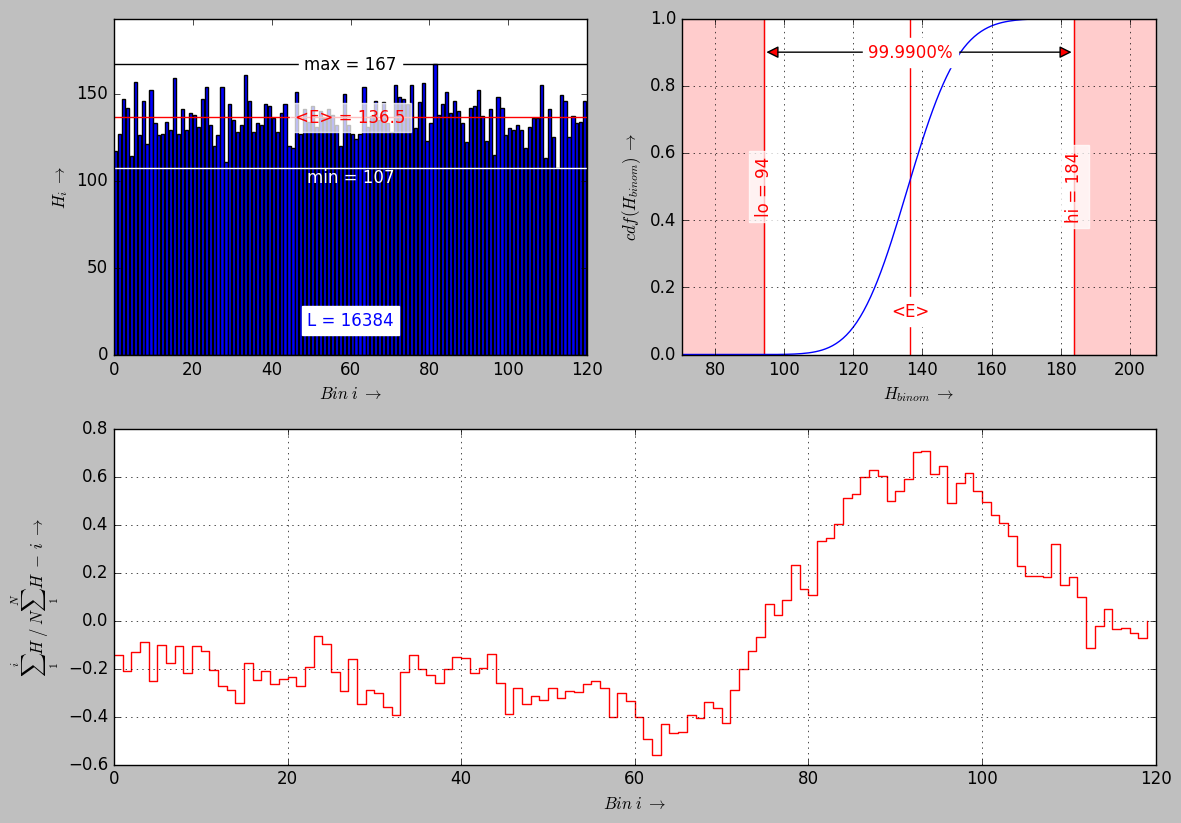

In [88]:
L = 2**14  # Anzahl der Einzelmessungen
N = 120     # Anzahl der Bins, in die die Messungen fallen
p = 1./N    # Wahrscheinlichkeit, dass das zu messende Zeitintervall in ein bestimmtes Bin fällt

# Binomialverteilung mit p = 1/N und L Bernoulli-Versuchen (= Einzelmessungen) -> "Hits" für 1 Bin
binom = scipy.stats.binom(n = L, p = p)
size = N#int(L/N) # Stichprobengröße für Binomialverteilung
# Stichprobe mit size Versuchsreihen einer Binomialverteilung für einzelnes Bin / eine Versuchsreihe für N Bins:
x_binom = binom.rvs(size=size)
mean = binom.mean() # Erwartungswert
std = binom.std()   # Standardabweichung 
n_sum = np.sum(x_binom) # Anzahl der Einzelmessungen, zurückgerechnet aus der Summe der Stichproben
# Quantile: Berechne die Bins bin_lo bzw. bin_hi, unterhalb derer der Anteil quant_lo bzw. quant_hi = 1 - quant_lo liegen
perc = 0.9999
quant_lo = (1 - perc)/2.; quant_hi = 1 - quant_lo # unteres bzw. oberes Quantil
bin_lo = binom.ppf(quant_lo);  bin_hi = binom.ppf(quant_hi) # untere bzw. obere Grenzen
#
N_bins = np.arange(2 * int(mean)) # array mit "Hits" = Anzahl der Messungen in einem Bin von 0 bis 2*Erwartungswert
cdf = binom.cdf(N_bins) # kumulierte Wahrscheinlichkeitsdichte
#print("Binomialverteilung:", x_binom)
print("Erwartungswert E =\t{0:.5g} \t(aus Stichprobe: {1:.5g}) Counts"
      .format(mean, np.sum(x_binom)/N))
print("Std.abweichung Sigma =\t{0:.4g} Counts\n".format(std))
print("{0:.4%} - {1:.4%} Quantile \t= {2:g} - {3:g} Counts"
      .format(quant_lo, quant_hi, bin_lo, bin_hi))
print("Minimum - Maximum (Stichprobe)\t= {0:d} - {1:d} Counts".format(min(x_binom), max(x_binom)))
Delta_max  = max(mean - min(x_binom), max(x_binom) - mean)
print("Delta (E - Min) bzw. (Max - E) \t= {0:.4g}  Counts\t(Delta / Sigma = {1:.4g})"
      .format(Delta_max, Delta_max/std))
print("n_sum = {0:g}".format(n_sum))
fig1 = plt.figure(1, figsize =(12,12))
ax1 = fig1.add_subplot(321) 
ax1.bar(range(N), x_binom)
ax1.axhline(y=mean, color='r')
ax1.text(N/2., mean, '<E> = {0:.4g}'.format(mean), color='r', ha='center', va='center', 
         backgroundcolor=(1,1,1,0.75))
ax1.axhline(y=min(x_binom), color='w')
ax1.text(N/2., min(x_binom), 'min = {0}'.format(min(x_binom)), color='w', ha='center', va='top')
ax1.axhline(y=max(x_binom), color='k')
ax1.text(N/2., max(x_binom), 'max = {0}'.format(max(x_binom)), color='k', ha='center', va='center', 
         backgroundcolor='w')
ax1.text(N/2., 0.1 * max(x_binom), 'L = {0}'.format(L), color='b', backgroundcolor='w', ha='center')
ax1.set_xlabel(r"$Bin\;i\; \rightarrow$"); ax1.set_ylabel(r"$H_{i}\; \rightarrow$")
ax1.set_ylim(0, max(bin_hi, max(x_binom)) * 1.05)
ax2 = fig1.add_subplot(322)
ax2.set_xlim(bin_lo * 0.75, bin_hi + bin_lo*0.25)
ax2.axvline(x=bin_lo, color = 'r'); ax2.axvline(x=mean, color = 'r'); 
ax2.axvline(x=bin_hi, color = 'r')
ax2.axvspan(0, bin_lo, facecolor='r', alpha=.2); ax2.axvspan(bin_hi, L, facecolor='r', alpha=.2)
ax2.text(mean, 0.1, '<E>', ha='center', va='bottom', color='r', backgroundcolor='w') # rotation=90,
ax2.text(bin_lo, 0.5, 'lo = {0:g}'.format(bin_lo), color='r', ha='center', va='center', 
         backgroundcolor=(1,1,1,0.75), rotation=90)
ax2.text(bin_hi, 0.5, 'hi = {0:g}'.format(bin_hi), color='r', ha='center', va='center', 
         backgroundcolor=(1,1,1,0.75), rotation=90)
    # double-headed arrow for period length using annotate command with empty text:
ax2.annotate('', (bin_lo, 0.9),(bin_hi, 0.9), xycoords='data', ha="center", va="center", size=18,
        arrowprops=dict(arrowstyle="<|-|>", facecolor = 'red', edgecolor='black' ))
ax2.text(mean, 0.9, '{0:.4%}'.format(perc), color='r', ha='center', va='center', 
         backgroundcolor=(1,1,1,1))
ax2.set_xlabel(r"$H_{binom}\;\rightarrow$"); ax2.set_ylabel(r"$cdf(H_{binom})\; \rightarrow$")
ax2.grid(True)
ax2.plot(N_bins, cdf)

#hist, bin_hist = np.histogram(x_binom, bins = N) 
hist_acc = np.cumsum(x_binom) # Accumulate histogram values and ...
hist_acc = hist_acc / hist_acc[-1] * N # scale in such a way that the last accumulated bin = N
ax3 = fig1.add_subplot(312); ax3.grid(True)
#ax3.step(range(N), hist_acc, 'b', where="post", label="Accumulated Histogram")
ax3.step(range(N), hist_acc - range(1,N+1), 'r', where="post", label="Delta")
ax3.set_xlabel(r"$Bin\;i\; \rightarrow$"); 
ax3.set_ylabel(r"$\sum^i_{1} H \; / \; N \sum^N_{1} H \; -\;  i\; \rightarrow$")
fig1.tight_layout()
plt.show()

Die Verzögerungszeiten $\Delta T_i$ der Tapped Delay Line (TDL) kennt man zunächst nicht, man kann die Werte auch messtechnisch nur sehr schwer bestimmen. Daher bestimmt man die Verzögerungen näherungsweise über das Histogramm, $H_i \approx L \Delta T_i / T_0$. Damit man beide Werte vergleichen kann, normalisiert man sie bezogen auf den jeweiligen Erwartungswert, $\Delta T_i / E(T_i) = T_i / (T_0 / N) \approx H_i / (L / N) = H_i / E(H_i)$. Mit dieser Skalierung schwanken beide Werte um den Wert 1 (Erwartungswert "getroffen").

Die nicht-ideale Quantisierungskennlinie der TDL erhält man, indem man deren Laufzeiten $\Delta T_i$ akkumuliert, näherungsweise berechnent durch Akkumulieren der Häufigkeiten $H_i$ des Histogramms. Die akkumulierten Werte haben jetzt als Maximum genau die Anzahl der Bins $N$, man könnte sie auch auf die Periodendauer $T_0$ beziehen.

Die Differenz zwischen akkumulierten normierten Häufigkeiten und der idealen Treppe entspricht der integralen Nichtlinearität ($INL$) der unkalibrierten TDL, skaliert in Vielfachen des Erwartungswerts (mittlere Breite eines Bins). Man sieht in der Simulation, dass die Abweichung mehrere mittlere Binbreiten betragen kann.

Allerdings sind die Darstellungen noch "falsch herum", d.h. die Eingangsgröße (Zeitintervalle) steht auf der y-Achse, die resultierende Größe (Bin) auf der x-Achse. Daher ist der $INL$ im Plot auch eingetragen mit $INL^{-1}$.

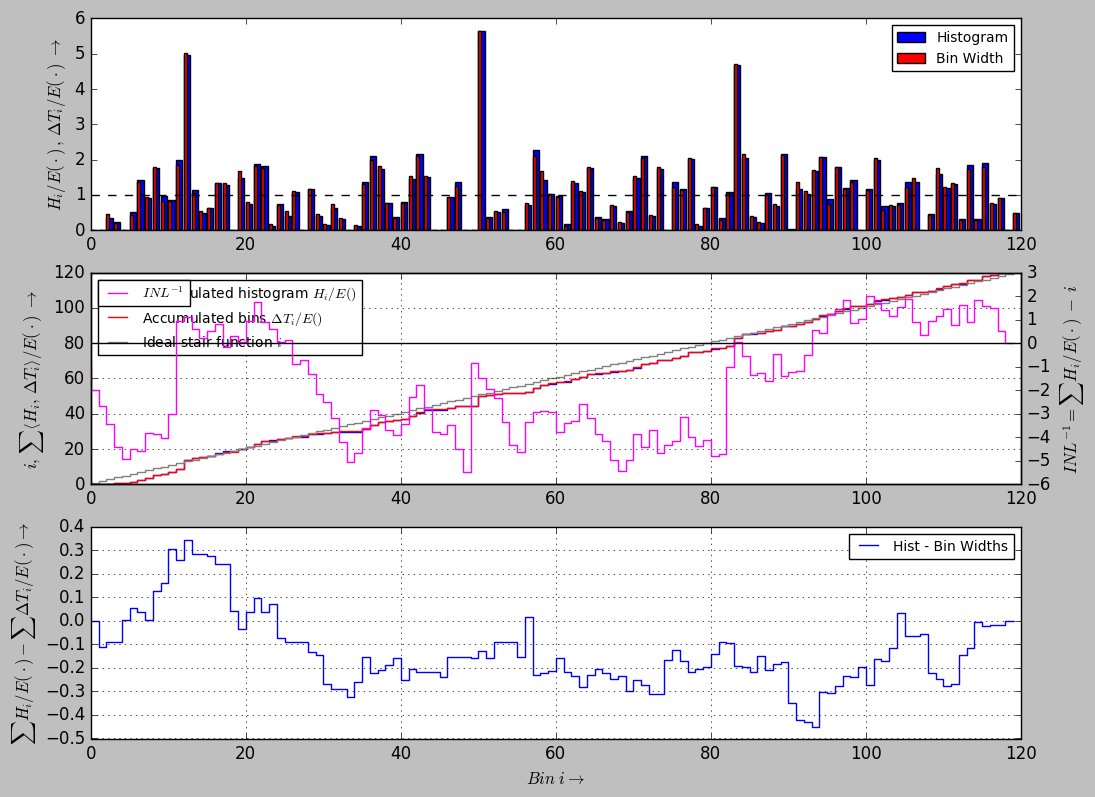

In [84]:
# N = 120 # number of bins
T0 = 2e-9 # clock period
norm = scipy.stats.uniform() # uniform distribution
x_norm = norm.rvs(size=L) * N # L uniformly distributed samples in the range 0 ... N
bin_widths = np.clip(np.random.rand(N) - 0.1, 0, 1000) * 3 # N bins with random / zero width
uw_bins = [[12, 6.3], [50,7.1], [83, 5.9]] # Ersetze einige bins durch ultrawide bins [Bin, width]
for b in uw_bins:
    bin_widths[b[0]] = b[1]
E_bins = np.mean(bin_widths) # Average value bin width = expectation value
bin_edges = np.cumsum(bin_widths / E_bins) # calculate N bin edges by accumulating scaled bins ...
bin_edges = np.insert(bin_edges, 0, 0) #  ... and add left most edge = 0 (-> N+1 edges) 
E_hist = L/N # Expectation value for histogram
# histogram() returns (values, edges). len(edges) = len(hist) + 1. Bin _edges_ are specified.
hist, _ = np.histogram(x_norm, bins = bin_edges)
hist_acc = np.cumsum(hist / E_hist) # Accumulate histogram values and scale with expectation value

fig3 = plt.figure(3, figsize=(12.0, 9.0))
ax11 =  fig3.add_subplot(311)
ax11.bar(range(N), hist/E_hist, label="Histogram") # 
ax11.bar(range(N), bin_widths/E_bins, width = 0.4, color="red", label="Bin Width")
ax11.set_ylabel(r"$H_i/ E(\cdot)\,, \,\Delta T_i /E(\cdot) \; \rightarrow$")
ax11.axhline(y=1, linestyle='--', color='k')
ax11.legend(loc='best', fontsize=10)
#
ax21 = fig3.add_subplot(312); ax21.grid(True)
ax21.step(range(N), hist_acc, 'b', where="post", label="Accumulated histogram $H_i / E()$")
ax21.step(range(N), bin_edges[1:], 'r', where="post", label="Accumulated bins $\Delta T_i / E()$")
ax21.step(range(N), range(N), color='0.5', label="Ideal stair function $i$")
ax21.set_ylabel(r"$i,\, \sum \left< H_i, \,\Delta T_i \right> / E(\cdot) \; \rightarrow$")
ax22 = ax21.twinx()
ax22.step(range(N), hist_acc - range(N) - 1, color="magenta", label="$INL^{-1}$")
ax22.axhline(y=0, color='k')
ax22.set_ylabel(r"$INL^{-1} = \sum H_i / E(\cdot) \; -\; i$")
ax22.legend(loc='best', fontsize=10)
ax21.legend(loc='best', fontsize=10)
#
ax31 = fig3.add_subplot(313); ax31.grid(True)
ax31.step(range(N), hist_acc - bin_edges[1:], label="Hist - Bin Widths")
ax31.set_xlabel(r"$Bin\;i \rightarrow$")
ax31.set_ylabel(r"$\sum H_i / E(\cdot) - \sum  \Delta T_i / E(\cdot) \rightarrow $")
ax31.legend(loc='best', fontsize=10);


Um die Achsen zu drehen, sucht man in der Simulation für eine fein aufgelöste Zeitachse die Werte, die gerade noch kleiner sind als die akkumulierten Binbreiten und erhält jetzt die INL. 

Zur Verbesserung der Genauigkeit betreibt man die TDL nicht *direkt*, sondern nutzt eine Tabelle mit dem akkumulierten Histogramm als Look-Up Table, in der man die korrekte Bin nachschaut. 

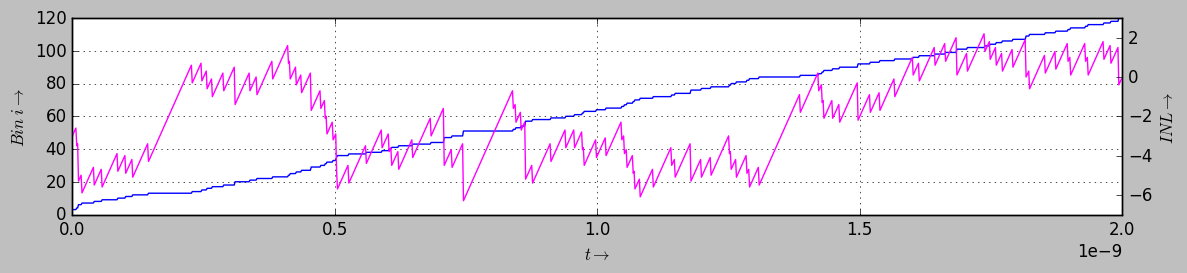

In [85]:
sub_bins = np.linspace(0, N, num = N*10, endpoint = False) # create fine-spaced sub-bin array
t_range = np.linspace(0, T_0, num = len(sub_bins), endpoint = False) # time array 
i_range = []
for t in sub_bins: # das kann bestimmt vektorisiert werden ...
    i_range.append(np.min(np.where(t < bin_edges))) # find smallest bin of hist_acc that is larger than t
fig4 = plt.figure(4)
ax41 = fig4.add_subplot(211); ax41.grid(True)
ax41.plot(t_range, i_range)
ax41.set_xlabel(r"$t \rightarrow $"); ax41.set_ylabel(r"$Bin \; i \rightarrow $");
ax42 = ax41.twinx()# fig4.add_subplot(212); ax42.grid(True)
ax42.plot(t_range, sub_bins - i_range, color="magenta")
ax42.set_ylabel(r"$INL \rightarrow $");
fig4.tight_layout()
